#Computing In Context
##Social Sciences Track
##Lecture 4--topics, trends, and dimensional scaling
###Matthew L. Jones


In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

Reading at scale: 


*Martha Ballard's Diary*
http://dohistory.org/diary/index.html

http://www.cameronblevins.org/posts/topic-modeling-martha-ballards-diary/



*Richmond Dispatch*

https://dsl.richmond.edu/dispatch/pages/home

Source: http://dlxs.richmond.edu/d/ddr/index.html



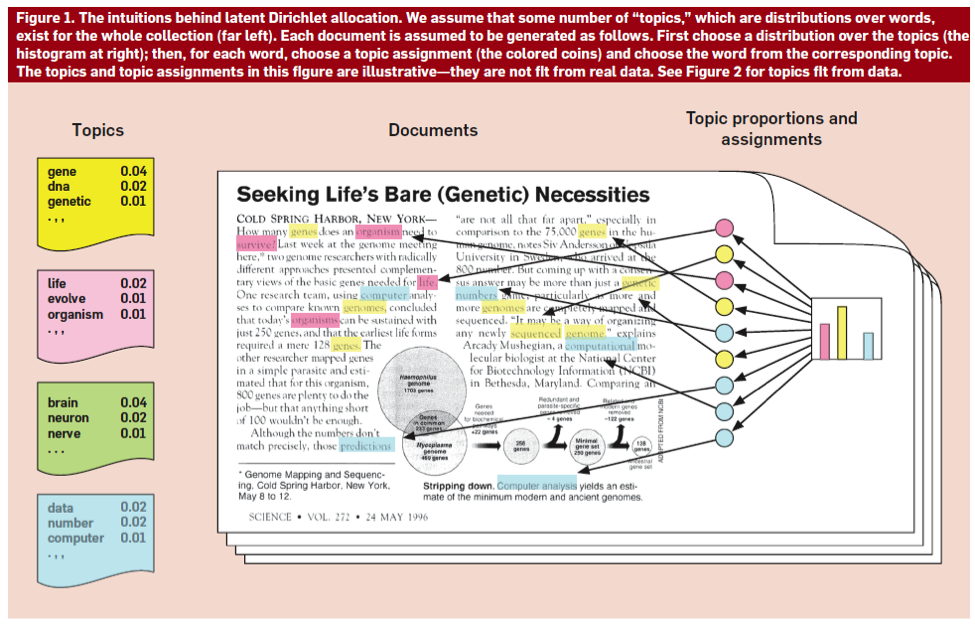

In [1]:
from IPython.display import Image
Image("http://journalofdigitalhumanities.org/wp-content/uploads/2013/02/blei_lda_illustration.png")

In [4]:
import textmining_blackboxes as tm
##when I put this on-line you'll have topic modeling helper functions!!

### IMPORTANT: `tm` is *our* temporarily helper, *not* a standard `python` package!! 
download it from my github:
https://github.com/matthewljones/computingincontext

In [3]:
#see if package imported correctly
tm.icantbelieve("butter")

I can't believe it's not butter




Let's keep using the remarkable narratives available from Documenting the American South (http://docsouth.unc.edu/docsouthdata/)

Assuming that you are storing your data in a directory in the same place as your iPython notebook.

#Let's look at Victorian novels for a little while

In [61]:
our_texts, names=tm.readtextfiles("data/british-fiction-corpus")

In [62]:
names

['ABronte_Agnes.txt',
 'ABronte_Tenant.txt',
 'Austen_Emma.txt',
 'Austen_Pride.txt',
 'Austen_Sense.txt',
 'CBronte_Jane.txt',
 'CBronte_Professor.txt',
 'CBronte_Villette.txt',
 'Dickens_Bleak.txt',
 'Dickens_David.txt',
 'Dickens_Hard.txt']

In [63]:
our_texts=tm.data_cleanse(our_texts)
#more necessary when have messy text
#eliminate escaped characters

####back to `vectorizer` from `scikit learn`

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
vectorizer=TfidfVectorizer(min_df=0.5, stop_words='english', use_idf=True)

In [9]:
document_term_matrix=vectorizer.fit_transform(our_texts)

In [10]:
# now let's get our vocabulary--the names corresponding to the rows
vocab=vectorizer.get_feature_names()


In [13]:
len(vocab)

7102

In [14]:
document_term_matrix.shape

(11, 7102)

In [15]:
document_term_matrix_dense=document_term_matrix.toarray()


In [16]:
dtmdf=pd.DataFrame(document_term_matrix_dense, columns=vocab)

In [17]:
dtmdf

,18,abandoned,abashed,abhorred,abhorrence,abide,abilities,ability,able,abode,...,youd,youll,young,younger,youngest,youre,youth,youthful,youve,zeal
0,0.000000,0.000000,0.001862,0.000000,0.001700,0.000000,0.003115,0.003400,0.025401,0.011833,...,0.004673,0.010011,0.081041,0.015724,0.001558,0.017133,0.003629,0.000000,0.011900,0.000000
1,0.000789,0.005939,0.000000,0.002161,0.004322,0.001980,0.000000,0.000000,0.017937,0.004457,...,0.010559,0.021208,0.047150,0.004612,0.000000,0.027717,0.006662,0.001818,0.015846,0.000720
2,0.000000,0.000000,0.000000,0.000570,0.000000,0.000522,0.001567,0.000000,0.029214,0.000441,...,0.000000,0.000000,0.077904,0.000811,0.002090,0.000000,0.004463,0.000959,0.000000,0.002281
3,0.000910,0.000000,0.000000,0.000000,0.004986,0.000761,0.004568,0.000000,0.031930,0.005142,...,0.000000,0.000699,0.076278,0.017739,0.009898,0.000000,0.005322,0.000000,0.000000,0.000000
4,0.000989,0.000827,0.000000,0.001805,0.003611,0.000000,0.007444,0.002708,0.029546,0.003491,...,0.000000,0.000000,0.066158,0.003854,0.003308,0.000000,0.004496,0.001519,0.000000,0.001805
5,0.000000,0.004706,0.000000,0.003210,0.000000,0.001176,0.000588,0.000000,0.010506,0.003972,...,0.002353,0.004321,0.037001,0.006395,0.000588,0.002941,0.007766,0.001620,0.005778,0.002568
6,0.003283,0.001373,0.001641,0.005996,0.000000,0.001373,0.000000,0.001499,0.008532,0.006956,...,0.004120,0.016393,0.061858,0.002133,0.000000,0.016480,0.012798,0.006305,0.011992,0.000000
7,0.000724,0.001212,0.001448,0.000661,0.001323,0.000606,0.000000,0.001323,0.007529,0.002558,...,0.000606,0.001669,0.053176,0.000941,0.003636,0.000606,0.012706,0.002782,0.000000,0.001323
8,0.000000,0.002917,0.001341,0.000000,0.000245,0.000000,0.000898,0.000980,0.012721,0.000758,...,0.003366,0.013598,0.074407,0.003137,0.001571,0.021317,0.005750,0.003296,0.004163,0.000000
9,0.000267,0.002905,0.001869,0.000000,0.000488,0.000223,0.002235,0.001219,0.007115,0.001320,...,0.004916,0.015798,0.049804,0.003124,0.001788,0.012290,0.005380,0.004309,0.004146,0.000244


####While this data frame is lovely to look at and useful to think with, it's tough on your computer's memory

In [11]:
#easy to program, but let's use a robust version from sklearn!
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
similarity=cosine_similarity(document_term_matrix)

#Note here that the `cosine_similiary` can take 
#an entire matrix as its argument

In [13]:
pd.DataFrame(similarity, index=names, columns=names)

,ABronte_Agnes.txt,ABronte_Tenant.txt,Austen_Emma.txt,Austen_Pride.txt,Austen_Sense.txt,CBronte_Jane.txt,CBronte_Professor.txt,CBronte_Villette.txt,Dickens_Bleak.txt,Dickens_David.txt,Dickens_Hard.txt
ABronte_Agnes.txt,1.000000,0.873077,0.766374,0.771317,0.750176,0.829614,0.783084,0.820091,0.756383,0.782174,0.736513
ABronte_Tenant.txt,0.873077,1.000000,0.761187,0.786333,0.777003,0.866513,0.821557,0.853758,0.785609,0.844785,0.810371
Austen_Emma.txt,0.766374,0.761187,1.000000,0.914527,0.801833,0.779011,0.642204,0.667375,0.814210,0.803813,0.766277
Austen_Pride.txt,0.771317,0.786333,0.914527,1.000000,0.828285,0.789536,0.660597,0.662716,0.806270,0.805168,0.767164
Austen_Sense.txt,0.750176,0.777003,0.801833,0.828285,1.000000,0.739302,0.671603,0.713728,0.666095,0.704389,0.698309
CBronte_Jane.txt,0.829614,0.866513,0.779011,0.789536,0.739302,1.000000,0.862033,0.884444,0.794386,0.823570,0.792873
CBronte_Professor.txt,0.783084,0.821557,0.642204,0.660597,0.671603,0.862033,1.000000,0.910828,0.680350,0.728871,0.692953
CBronte_Villette.txt,0.820091,0.853758,0.667375,0.662716,0.713728,0.884444,0.910828,1.000000,0.684109,0.750113,0.712343
Dickens_Bleak.txt,0.756383,0.785609,0.814210,0.806270,0.666095,0.794386,0.680350,0.684109,1.000000,0.905987,0.878677
Dickens_David.txt,0.782174,0.844785,0.803813,0.805168,0.704389,0.823570,0.728871,0.750113,0.905987,1.000000,0.901665


##that is a *symmetrical* matrix relating each of the texts (rows) to another text (row) 

In [28]:
similarity_df.ix[1].order(ascending=False)

ABronte_Tenant.txt       1.000000
ABronte_Agnes.txt        0.873077
CBronte_Jane.txt         0.866513
CBronte_Villette.txt     0.853758
Dickens_David.txt        0.844785
CBronte_Professor.txt    0.821557
Dickens_Hard.txt         0.810371
Austen_Pride.txt         0.786333
Dickens_Bleak.txt        0.785609
Austen_Sense.txt         0.777003
Austen_Emma.txt          0.761187
Name: ABronte_Tenant.txt, dtype: float64

##can do lots of things with similarity matrix

you've already seen hierarchical clustering

##Multidimension scaling

- Technique to visualize distances in high dimensional spaces in ways we can cognize.
- Keep distances but reduce dimensionality

In [14]:
#here's the blackbox
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
positions= mds.fit_transform(1-similarity)

In [15]:
positions.shape

(11, 2)

It's an 11 by 2 matrix

OR

simply an (x,y) coordinate pair for each of our texts

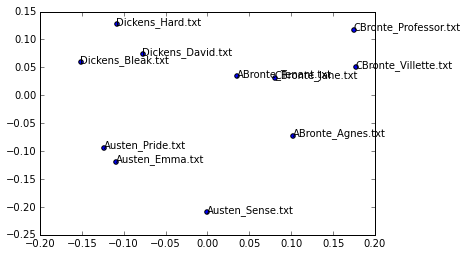

In [16]:
#let's plot it: I've set up a black box
tm.plot_mds(positions,names)

In [17]:
names=[name.replace(".txt", "") for name in names]

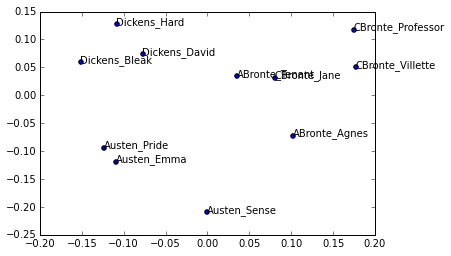

In [18]:
tm.plot_mds(positions,names)

What has this got us?

It suggests that even this crude measure of similarity is able to capture something significant.

Note: the axes don't really *mean* anything

#interesting but what does it mean?


#topic modeling
##unsupervised algorithm for finding the major topics of texts
###unlike hierarchical clustering, assumes texts spring from multiple sets of topics
###the big thing in much text modeling, from humanities, to Facebook, to NSA
###many variations

#fantastic `python` package gensim
"corpora" = a collection of documents or texts

`gensim` likes its documents to be a list of lists of words, not a list of strings

Get the stoplist in the data directory in my github.

In [3]:
our_texts, names=tm.readtextfiles("Data/PCCIPtext")

In [5]:
our_texts=tm.data_cleanse(our_texts)

In [6]:
#improved stoplist--may be too complete
stop=[]
with open('data/stoplist-multilingual') as f:
    stop=f.readlines()
    stop=[word.strip('\n') for word in stop]

In [7]:
texts = [[word for word in document.lower().split() if word not in stop] for document in our_texts] #gensim requires list of list of words in documents

In [8]:
from gensim import corpora, models, similarities, matutils
"""gensim includes its own vectorizing tools"""
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

#doc2bow just means `doc`uments to `b`ag `o`f `w`ords
#ok, this has just vectorized our texts; it's another form

##Now we are going to call the topic modeling black box
###the key parameter is *how many* distinct topics we want the computer to find
####this will take a while


In [10]:
number_topics=40
model = models.LdaModel(corpus, id2word=dictionary, num_topics=number_topics, passes=10) #use gensim multicore LDA

In [11]:
model.show_topics()

['0.011*security + 0.010*cyber + 0.009*national + 0.008*6633 + 0.008*sjud4 + 0.007*government + 0.006*critical + 0.006*09 + 0.006*infrastructure + 0.005*plan',
 '0.009*gas + 0.009*oil + 0.009*natural + 0.008*national + 0.007*infrastructure + 0.007*industry + 0.007*technology + 0.007*risk + 0.007*critical + 0.007*government',
 '0.013*nder + 0.007*program + 0.007*members + 0.007*fema + 0.006*data + 0.006*training + 0.006*office + 0.005*units + 0.005*enclosurei + 0.005*administration',
 '0.023*security + 0.018*critical + 0.014*infrastructure + 0.013*national + 0.011*sector + 0.009*government + 0.008*federal + 0.008*private + 0.008*protection + 0.007*agencies',
 '0.015*ati + 0.011*program + 0.011*army + 0.010*chemi + 0.010*cl + 0.009*wi + 0.009*dod + 0.008*gao + 0.008*defense + 0.008*ns',
 '0.022*air + 0.020*force + 0.013*warfare + 0.010*equipment + 0.009*report + 0.009*dod + 0.009*systems + 0.008*gao + 0.008*program + 0.007*test',
 '0.023*pki + 0.015*federal + 0.011*key + 0.009*00 + 0.008

In [14]:
topics_indexed=[[b for (a,b) in topics] for topics in model.show_topics(number_topics,10,formatted=False)]
topics_indexed=pd.DataFrame(topics_indexed)

In [15]:
topics_indexed

,0,1,2,3,4,5,6,7,8,9
0,security,cyber,national,6633,sjud4,government,critical,09,infrastructure,plan
1,materials,hazardous,transportation,dot,training,regulations,federal,response,emergency,safety
2,nder,program,members,fema,data,training,office,units,enclosurei,administration
3,surveillance,electronic,enforcement,federal,law,service,policy,department,court,data
4,security,dod,homeland,national,defense,emergency,guard,systems,response,support
5,national,security,emergency,federal,order,plans,defense,secretary,executive,develop
6,infrastructure,security,critical,sector,government,national,federal,protection,homeland,private
7,security,federal,materials,hazardous,systems,government,technology,defense,national,response
8,millimeter,graphite,smes,cadmium,crystalline,transmitters,052,rated,metals,dormant
9,interoperability,joint,services,c3,communications,service,agency,equipment,tactical,air


So which topics most significant for each document?
Pass a bag of words version of each document to the model.

In [16]:
model[dictionary.doc2bow(texts[1])]

[(6, 0.27494201620509567),
 (13, 0.2974909141776681),
 (21, 0.16110147750989032),
 (25, 0.023097844867048457),
 (31, 0.023331172978793457),
 (38, 0.207918188456342)]

Let's find them for every document--with a list comprehension, of course

In [17]:
primarytopics=[model[dictionary.doc2bow(text)] for text in texts]

make it pretty with a list comprehension

In [39]:
import numpy as np
primarytopics_matrix=pd.DataFrame(np.matrix([matutils.sparse2full(primarytopic, number_topics) for primarytopic in primarytopics]))

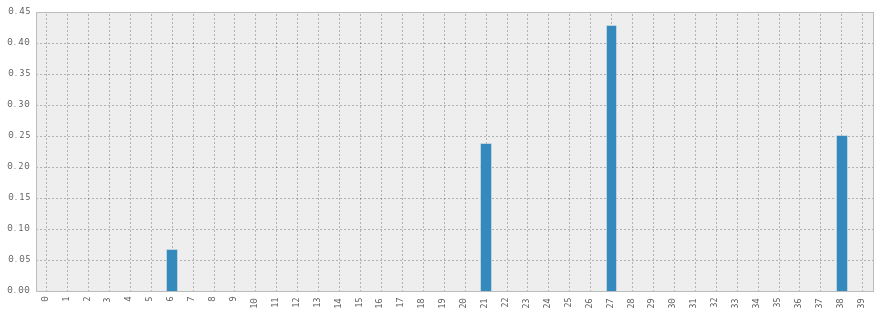

In [54]:
primarytopics_matrix.ix[18].plot(kind="bar")

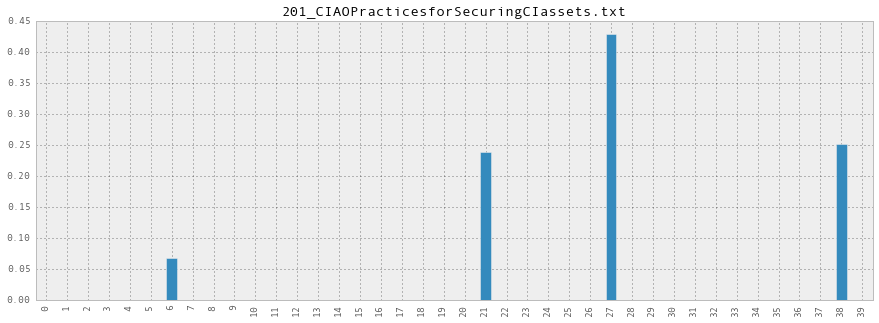

In [55]:
primarytopics_matrix.ix[18].plot(kind="bar", title=names[18])

In [58]:
topics_indexed.ix[[6, 21, 27, 38]]

,0,1,2,3,4,5,6,7,8,9
6,infrastructure,security,critical,sector,government,national,federal,protection,homeland,private
21,systems,security,data,government,technology,federal,national,public,agencies,policy
27,security,key,electronic,encryption,standards,nsa,systems,privacy,law,nist
38,security,critical,infrastructure,national,sector,government,federal,private,protection,agencies


In [59]:
#FIND which documents focus on a particular topic

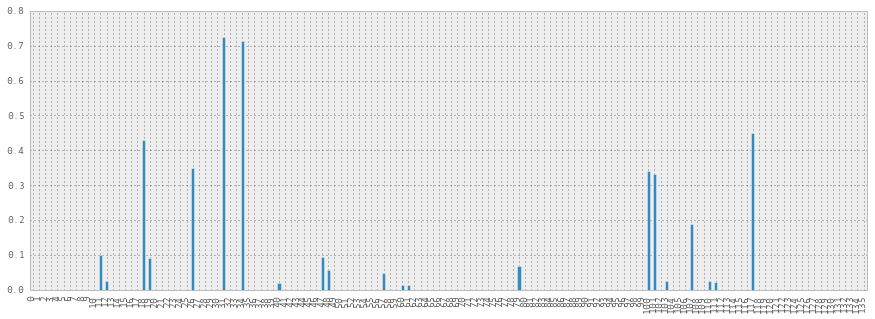

In [60]:
primarytopics_matrix[27].plot(kind="bar")

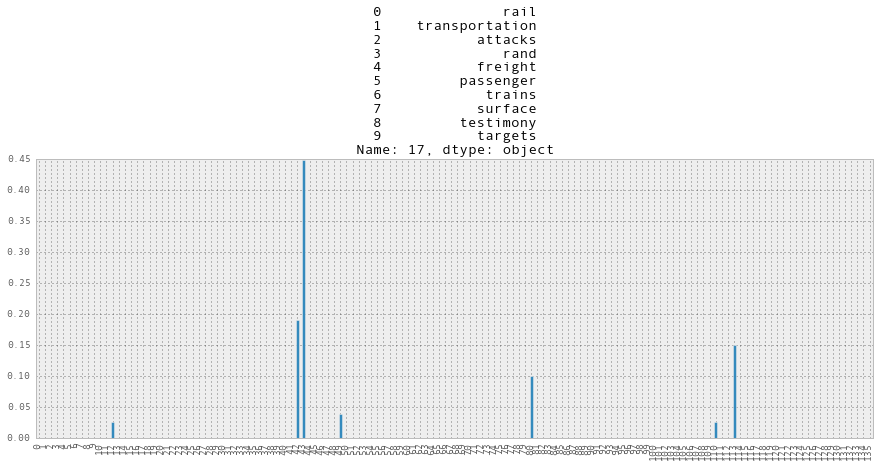

In [53]:
primarytopics_matrix[17].plot(kind="bar", title=str(topics_indexed.ix[17]))

In [ ]:
#that's ugly!